# Part 1: Setup

## Preparations

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.core import MadMiner
from madminer.plotting import plot_2d_morphing_basis


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## Define parameter space

In [3]:
miner = MadMiner()

miner.add_parameter(
    lha_block='dim6',
    lha_id=2,
    parameter_name='CWL2',
    morphing_max_power=2,
    param_card_transform="10*16.52*theta",
    parameter_range=(-1.,1.)
)
miner.add_parameter(
    lha_block='dim6',
    lha_id=5,
    parameter_name='CPWL2',
    morphing_max_power=2,
    param_card_transform="10*16.52*theta",
    parameter_range=(-1.,1.)
)

10:54 madminer.core        INFO    Added parameter CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-1.0, 1.0))
10:54 madminer.core        INFO    Added parameter CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-1.0, 1.0))


## Morphing

In [5]:
miner.set_morphing(include_existing_benchmarks=True, max_overall_power=2)

10:54 madminer.core        INFO    Optimizing basis for morphing
10:54 madminer.core        INFO    Set up morphing with 2 parameters, 6 morphing components, 0 predefined basis points, and 6 new basis points


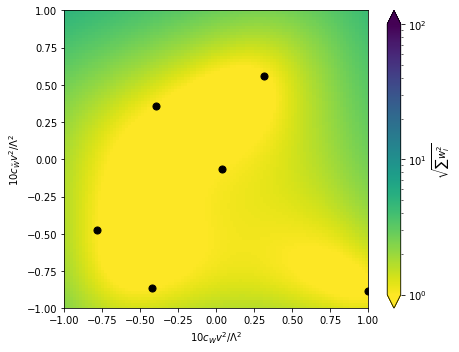

In [6]:
fig = plot_2d_morphing_basis(
    miner.morpher,
    xlabel=r'$10 c_{W} v^2 / \Lambda^2$',
    ylabel=r'$10 c_{\tilde{W}} v^2 / \Lambda^2$',
    xrange=(-1.,1.),
    yrange=(-1.,1.)
)

## Save setup

In [7]:
miner.save('data/setup.h5')

10:54 madminer.core        INFO    Saving setup (including morphing) to data/setup.h5
